<a href="https://colab.research.google.com/github/Bustagar/APRENDIZAJE-AUTOMATICO-1/blob/main/TP2_AA1_aprendizaje_no_supervisado(Resuelto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

🧑 Juan Sebastian Bustamante Garcia

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

## Dataset elegido: https://archive.ics.uci.edu/dataset/445/absenteeism+at+work

## Ausentismo laboral:

## Descripción de variables

1. Identificación individual (ID)
2. Razón de ausencia (ICD)
Ausencias certificadas por el Código Internacional de Enfermedades (ICD) estratificadas en 21 categorías (I a XXI) de la siguiente manera:

I. Ciertas enfermedades infecciosas y parasitarias II. Neoplasias III. Enfermedades de la sangre y órganos hematopoyéticos, y ciertos trastornos que afectan el sistema inmunológico IV. Enfermedades endocrinas, nutricionales y metabólicas V. Trastornos mentales y del comportamiento VI. Enfermedades del sistema nervioso VII. Enfermedades del ojo y sus anexos VIII. Enfermedades del oído y de la apófisis mastoidea IX. Enfermedades del sistema circulatorio X. Enfermedades del sistema respiratorio XI. Enfermedades del sistema digestivo XII. Enfermedades de la piel y del tejido subcutáneo XIII. Enfermedades del sistema musculoesquelético y del tejido conjuntivo XIV. Enfermedades del sistema genitourinario XV. Embarazo, parto y puerperio XVI. Ciertas condiciones originadas en el período perinatal XVII. Malformaciones congénitas, deformaciones y anomalías cromosómicas XVIII. Síntomas, signos y hallazgos clínicos y de laboratorio anormales no clasificados en otra parte XIX. Lesiones, envenenamientos y ciertas otras consecuencias de causas externas XX. Causas externas de morbilidad y mortalidad XXI. Factores que influyen en el estado de salud y contacto con los servicios de salud

Y 7 categorías sin seguimiento de pacientes (CID):

Consulta médica (22)

Donación de sangre (23)

Análisis de laboratorio (24)

Ausencia injustificada (25)

Fisioterapia (26)

Consulta dental (27)

3. Mes de ausencia
4. Día de la semana (Lunes (2), Martes (3), Miércoles (4), Jueves (5), Viernes (6))
5. Estaciones
6. Gasto en transporte
7. Distancia de la residencia al trabajo (kilómetros)
8. Tiempo de servicio
9. Edad
10. Carga laboral promedio/día
11. Objetivo alcanzado
12. Falla disciplinaria (sí=1; no=0)
13. Educación (Secundaria (1), Pregrado (2), Posgrado (3), Maestría y doctorado (4))
14. Hijo/a (número de hijos/as)
15. Bebedor social (sí=1; no=0)
16. Fumador social (sí=1; no=0)
17. Mascota (número de mascotas)
18. Peso
19. Altura
20. Índice de masa corporal
21. Tiempo de ausentismo en horas (variable objetivo)

### Carga del dataset

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
url = "https://raw.githubusercontent.com/Bustagar/APRENDIZAJE-AUTOMATICO-1/refs/heads/main/Absenteeism_at_work.csv"

df = pd.read_csv(url, sep=';')
df.sample(5)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
287,15,7,9,2,4,291,31,12,40,294.217,...,0,1,1,1,0,1,73,171,25,40
183,28,28,3,2,3,225,26,9,28,343.253,...,0,1,1,0,0,2,69,169,24,1
322,23,1,11,2,4,378,49,11,36,284.031,...,0,1,2,0,1,4,65,174,21,8
165,14,1,3,2,2,155,12,14,34,343.253,...,0,1,2,1,0,0,95,196,25,16
175,28,11,3,2,3,225,26,9,28,343.253,...,0,1,1,0,0,2,69,169,24,8


## Renombramos las columnas para mejor entendimiento

In [59]:
df.rename({
    'ID': 'Id',
    'Reason for absence': 'Razón de ausencia',
    'Month of absence': 'Mes de ausencia',
    'Day of the week': 'Día de la semana',
    'Seasons': 'Estaciones',
    'Transportation expense': 'Gasto en transporte',
    'Distance from Residence to Work': 'Distancia de la residencia al trabajo',
    'Service time': 'Tiempo de servicio',
    'Age': 'Edad',
    'Work load Average/day ': 'Carga laboral promedio/día',
    'Hit target': 'Objetivo alcanzado',
    'Disciplinary failure': 'Falla disciplinaria',
    'Education': 'Educación',
    'Son': 'Hijo/a',
    'Social drinker': 'Bebedor social',
    'Social smoker': 'Fumador social',
    'Pet': 'Mascota',
    'Weight': 'Peso',
    'Height': 'Altura',
    'Body mass index': 'Índice de masa corporal',
    'Absenteeism time in hours': 'Tiempo de ausentismo en horas'}, axis=1, inplace=True)


## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


### 2.1 Describan las variables (media, distribución, outliers).

In [60]:
df.describe()

,Id,Razón de ausencia,Mes de ausencia,Día de la semana,Estaciones,Gasto en transporte,Distancia de la residencia al trabajo,Tiempo de servicio,Edad,Carga laboral promedio/día,...,Falla disciplinaria,Educación,Hijo/a,Bebedor social,Fumador social,Mascota,Peso,Altura,Índice de masa corporal,Tiempo de ausentismo en horas
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Variable objetivo:

- Tiene una mediana de casi 7 horas, y una media  solo de 3, lo cual podria estar en presencia de outliers.
- La maxima es de 120 horas lo que dice que hay personas que faltaron toda la semana.
- La variación estandar es de 13 horas con respecto a la media.

### 2.2 Gráfico boxplot para verificacion de outliers

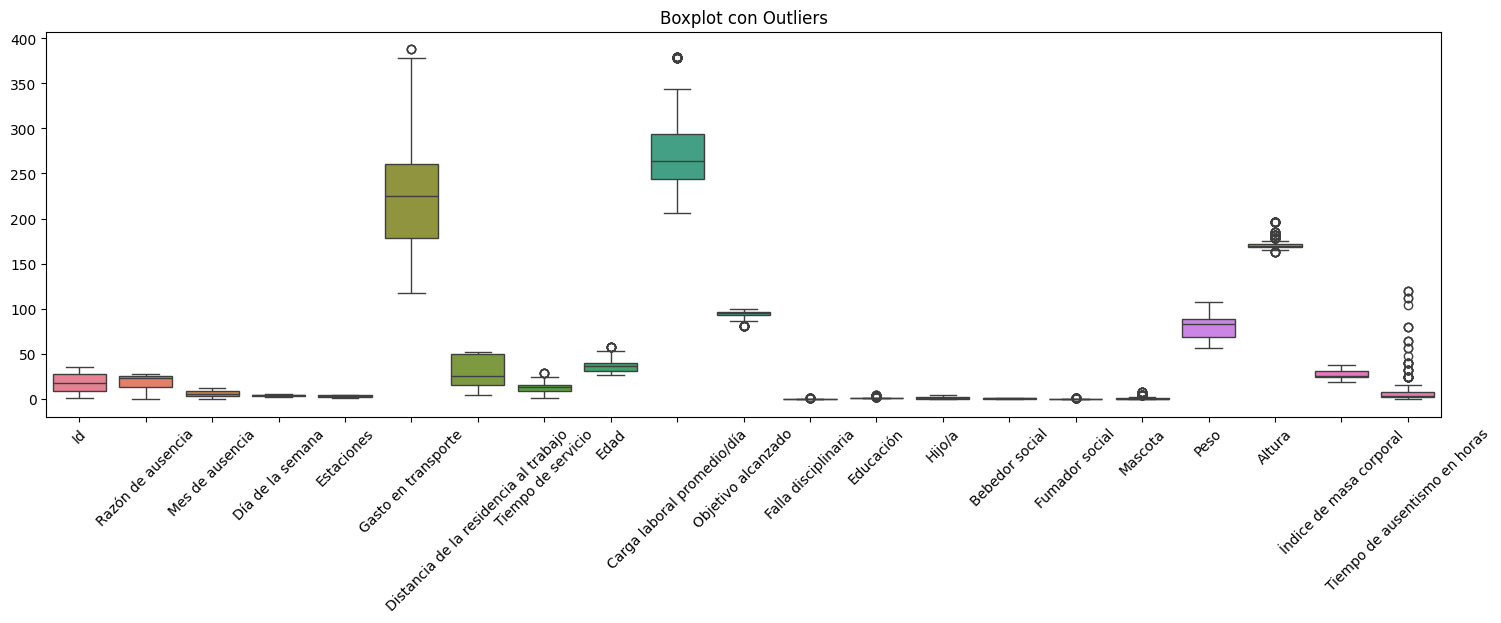

In [61]:
# Crear el boxplot con valores atípicos visibles
plt.figure(figsize=(18,5))
sns.boxplot(data=df, showfliers=True)  # showfliers=True muestra los outliers

# Mostrar gráfico
plt.title("Boxplot con Outliers")
plt.xticks(rotation=45)
plt.show()

### 2.3 Gráficos de dispersión (scatterplots)

In [63]:
# Definir las features y el target
features = df.drop(columns=["Tiempo de ausentismo en horas", "Id"])
target = "Tiempo de ausentismo en horas"

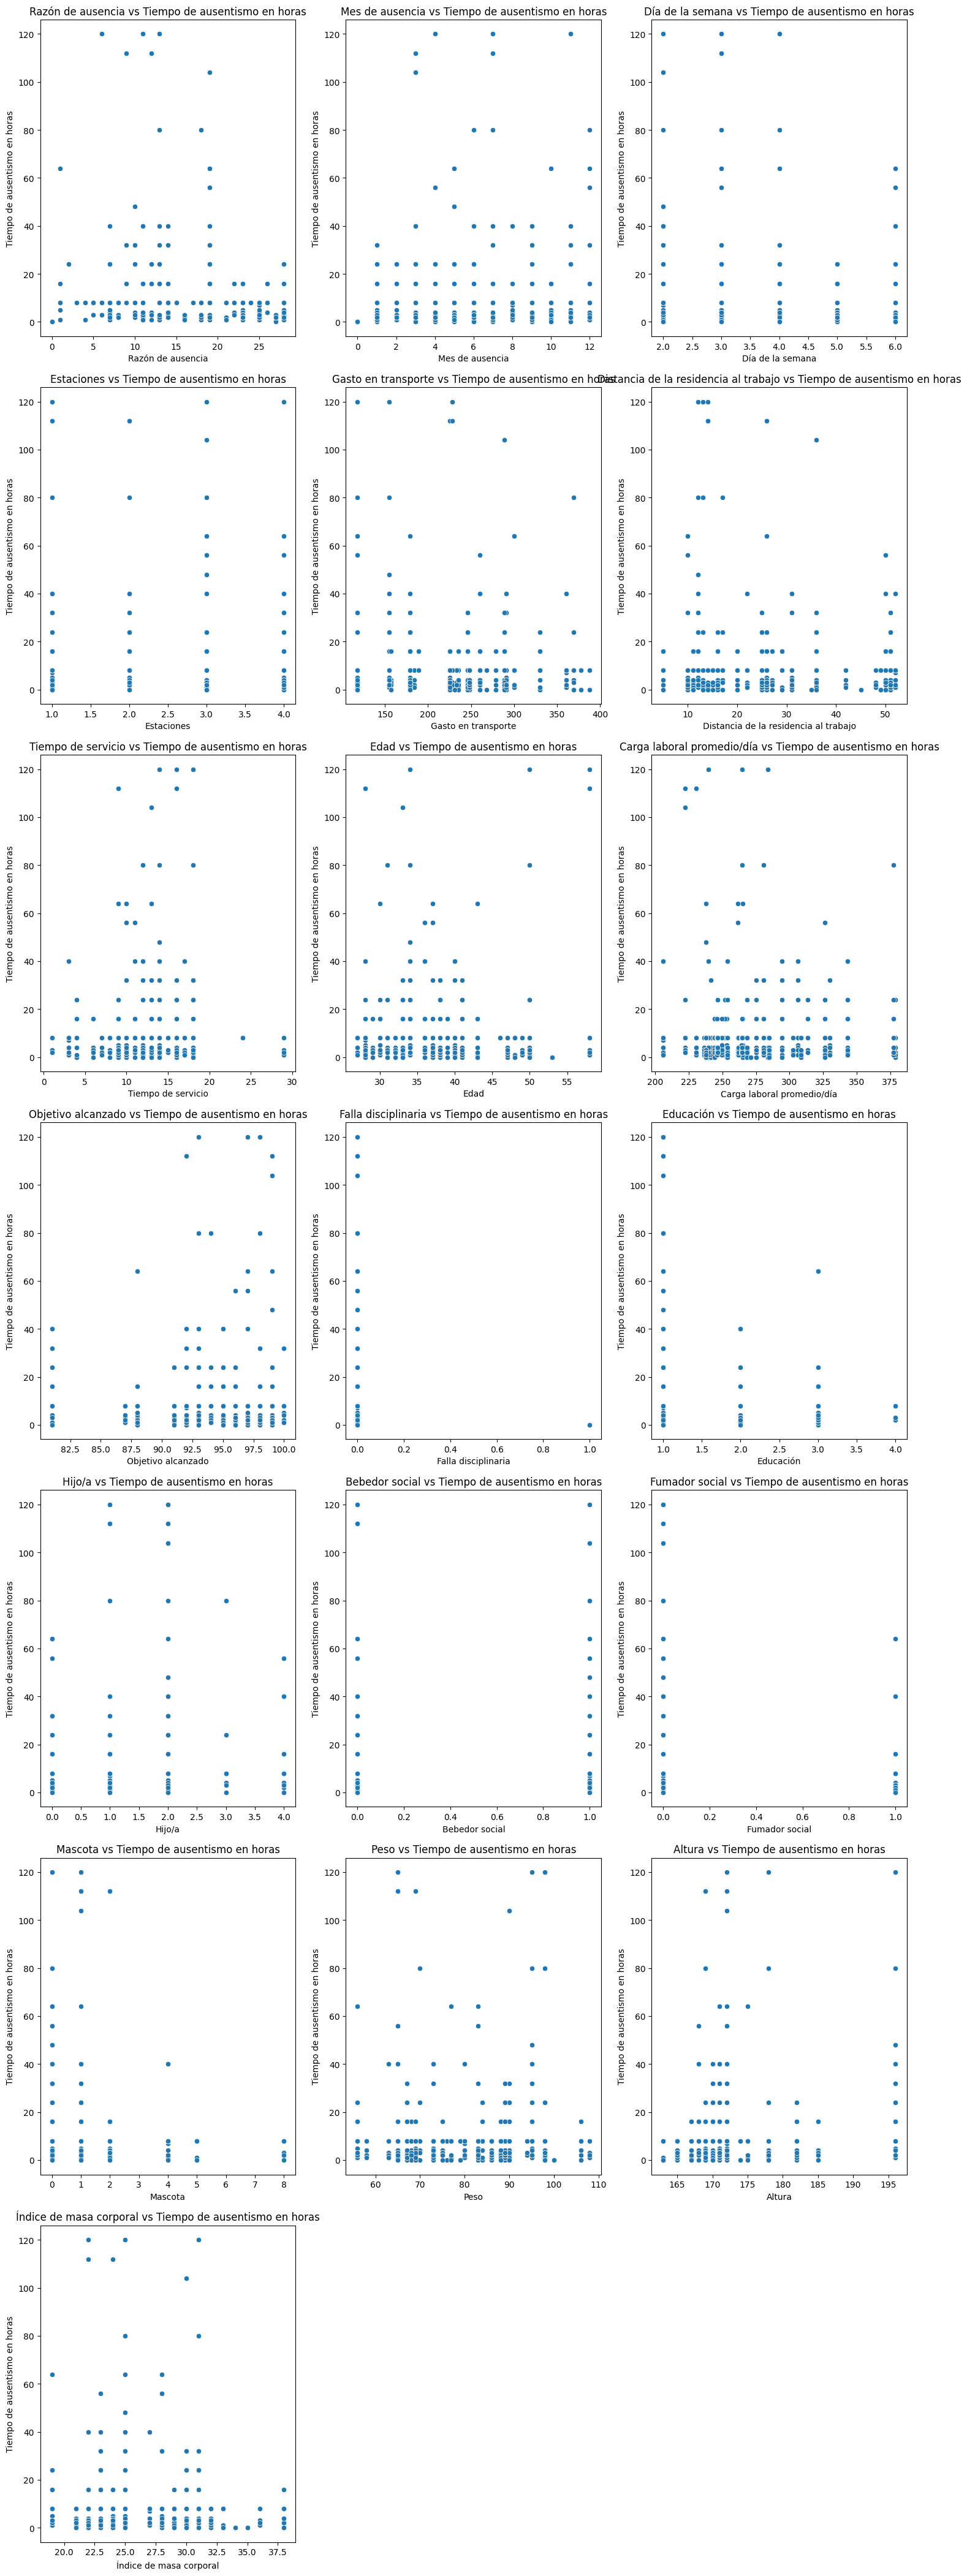

In [64]:
# Contar la cantidad de características a graficar
num_features = len(features)  # 19 características
num_cols = 3  # Número de columnas fijo
num_rows = -(-num_features // num_cols)  # Calcula las filas necesarias (redondeo hacia arriba)

# Crear la figura con subgráficos ajustados
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Asegurar que axes sea una lista para evitar errores de índice
axes = axes.flatten()

# Iterar sobre cada feature y graficarla
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f"{feature} vs {target}")

# Ocultar subgráficos vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina los gráficos sobrantes

plt.tight_layout()
plt.show()


## Resolución:

***Target = Tiempo de ausentismo en horas***

*   **Razón ausencia vs Target =** Los casos de enfermedades que se encuentran
entre 10 y 20 suelen tener mas tiempo de ausencia que el resto.

*   **Mes de ausencia vs Target =** Entre los meses Marzo y Diciembre se registar que tienen ausencia de entre 20 a 80 horas.

*   **Día de la semana vs Target =** Los dias lunes, martes y miércoles suelen tener mas faltas acumulando hasta 120 horas.

*   **Estaciones vs target =** Considerando solo 4 puntos en estaciones, deduzco que se refiere a las estaciones del año y se visualiza que en otoño(3) tiempo del Norte, suceden mas horas de ausencia que en las otras estaciones.

*   **Gasto en trasporte vs Target =** los que tienen bajo gasto en transporte sueles tener mas tiempo de ausentismo.

*   **Distancia de la residencia vs Target =** Los que viven a menor distancia de la residencia suelen llegar mas tarde aumentando el ausentismo.

*   **Tiempo de servicio vs Target =** los que tienen entre 8 y 18 años de servicio suelen tener más tiempo en ausentismo.

*   **Edad vs Target =** Los que tienen entre 30 y 38 años de edad suelen tener mas tiempo de ausentismo.

*   **Carga laboral vs Target =** Los que tienen poca carga laboral suelen tener mayor ausentismo.

*   **Objetivo alcanzado vs Target =** Los que cumplen el objetivo entre 92% y 100%, tienen mas ausentismo.

*   **Fallas disciplinarias vs Target =** Los que no tienen fallas disciplinarias tienden a tener mas ausentismo.

*   **Educación vs Target =** Los que solo han terminado la secundaria tienen mayor ausencia.

*   **Hijos vs Target =** Los que tienen entre 1 y 2 hijos suelten tener mas ausencia.

*   **Fumador Social vs Target =** El Fumador ligeramente suele tener mas ausencia que uno que no.

*   **Mascotas vs Target =** Los que tienen hasta una mascota suelen tener mas ausencia.

*   **Peso vs Target =** Los que pesan 70 y 100 kilos tiene un aumento en ausencia.

*   **Altura vs Target =** Los que miden entre 168 y 180 tienen mas ausencia, pero se deduce que la estatura media es la mencionada.

*   **Indice de masa corporal vs Target =** Los que tienen entre 21 y 30 de IMC, suelen tener mas ausencia.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## 3.1 Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).

In [65]:
df.isnull().sum()

,0
Id,0
Razón de ausencia,0
Mes de ausencia,0
Día de la semana,0
Estaciones,0
Gasto en transporte,0
Distancia de la residencia al trabajo,0
Tiempo de servicio,0
Edad,0
Carga laboral promedio/día,0


⚓ No hay valores nulos para imputar

## 3.2 Escalado de features aplizando Z-Score

In [66]:
from sklearn.preprocessing import StandardScaler

In [68]:
# Seleccionar las columnas a escalar (excluyendo la variable objetivo)
features = df.drop(columns=['Id'])

# Aplicar StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convertir de nuevo a DataFrame para mejor visualización
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

# Ver las primeras filas escaladas
df_scaled.sample(5)

,Razón de ausencia,Mes de ausencia,Día de la semana,Estaciones,Gasto en transporte,Distancia de la residencia al trabajo,Tiempo de servicio,Edad,Carga laboral promedio/día,Objetivo alcanzado,Falla disciplinaria,Educación,Hijo/a,Bebedor social,Fumador social,Mascota,Peso,Altura,Índice de masa corporal,Tiempo de ausentismo en horas
603,-0.856249,-1.259281,0.059924,-0.490149,0.174425,1.441240,-2.636762,-0.841778,-0.185522,0.638686,-0.239046,1.052506,-0.017234,0.872872,-0.280566,5.506478,-0.857131,0.975828,-1.325617,-0.294575
53,0.448970,0.779180,-0.643947,1.309902,-1.544379,-1.324030,-0.582863,0.084950,-0.768970,-0.685201,-0.239046,-0.433857,-0.928191,-1.145644,-0.280566,-0.566240,0.307963,-0.019046,0.308921,-0.369639
357,-0.025655,1.652806,-1.347819,-0.490149,1.011408,0.429556,0.101770,-0.532868,-0.893151,-0.420423,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.192850,0.851673,-0.019046,0.775932,0.080744
671,-0.025655,-0.676863,0.763796,0.409877,0.054856,-0.244901,-0.811074,-1.305142,-0.645686,-0.949978,-0.239046,-0.433857,-0.017234,-1.145644,-0.280566,0.951940,-0.779458,-0.516483,-0.625100,0.080744
163,-0.737593,-0.968072,1.467667,-0.490149,0.577971,1.373794,-0.354652,-0.069505,1.838576,0.109131,-0.239046,-0.433857,2.715637,0.872872,-0.280566,-0.566240,-1.090150,-0.682295,-0.858606,2.482788


Normalicé los datos con Z-score para que los clusters no se vean afectados por rangos muy distintos.

## 3.3 Limpieza: indique cuáles features descarta. Justifique.

✅ Elimine la feature "Id", ya que no tiene sentido mantener un numero identificatorio que no influye en absoluto en el algortimo.

## 3.4 Eliminación de outliers

In [76]:
# Función para eliminar outliers usando IQR en todas las columnas numéricas
def eliminar_outliers(df_scaled):
    for columna in df_scaled.select_dtypes(include=['number']).columns:  # Solo columnas numéricas
        Q1 = df_scaled[columna].quantile(0.25)
        Q3 = df_scaled[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir límites para cada columna
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar valores fuera de estos límites
        df_scaled = df_scaled[(df_scaled[columna] >= limite_inferior) & (df_scaled[columna] <= limite_superior)]

    return df_scaled

# Aplicar la función al DataFrame escalado
df_filtrado = eliminar_outliers(df_scaled)

# Muestra aleatoria de los datos filtrados
print(df_filtrado.sample(5))

     Razón de ausencia  Mes de ausencia  Día de la semana  Estaciones  \
339          -0.856249         1.652806         -1.347819    1.309902   
443           1.042251        -0.094446         -0.643947    0.409877   
632           0.923595        -0.968072          0.763796   -0.490149   
351           1.042251         1.652806          1.467667    1.309902   
357          -0.025655         1.652806         -1.347819   -0.490149   

     Gasto en transporte  Distancia de la residencia al trabajo  \
339             0.054856                              -0.244901   
443            -1.544379                              -1.324030   
632            -0.632665                               1.441240   
351            -0.632665                               1.441240   
357             1.011408                               0.429556   

     Tiempo de servicio      Edad  Carga laboral promedio/día  \
339           -0.811074 -1.305142                   -0.893151   
443           -0.582863  0.0

## 3.5 Visualización de como quedaron los datos sin outliers

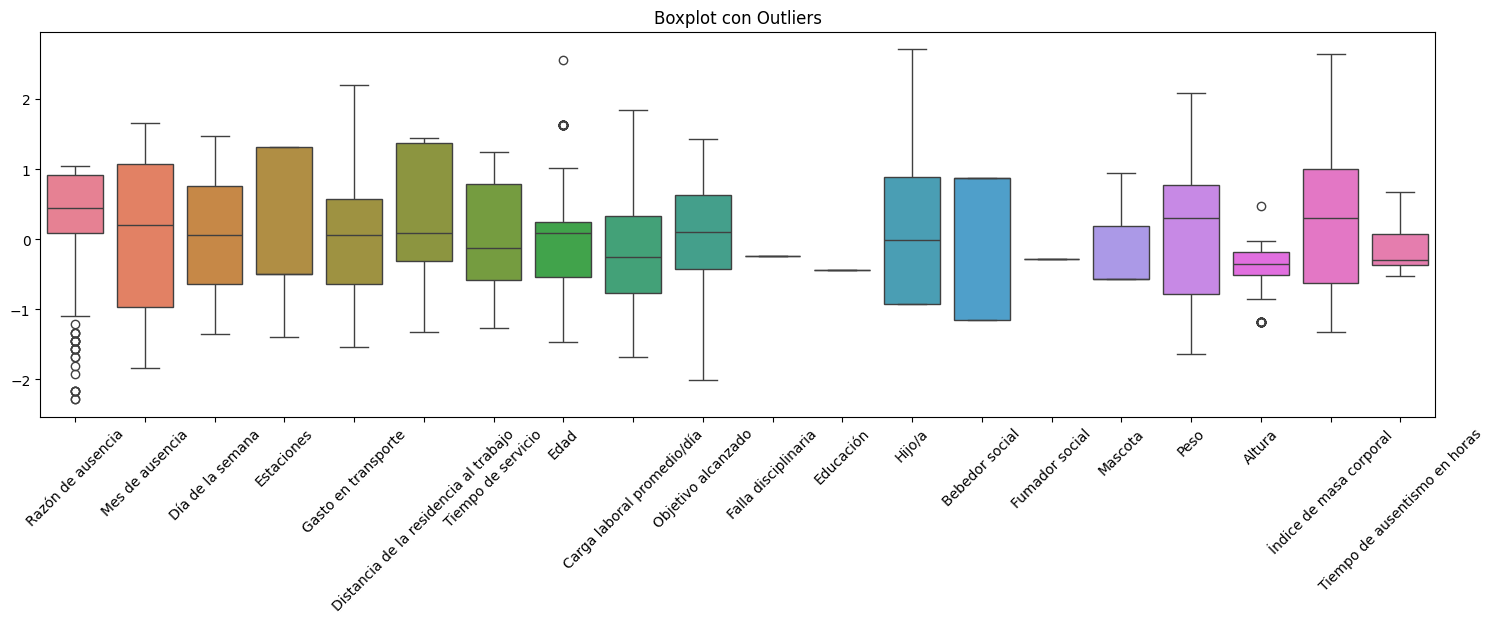

In [77]:
# Crear el boxplot con valores atípicos visibles
plt.figure(figsize=(18,5))
sns.boxplot(data=df_filtrado, showfliers=True)  # showfliers=True muestra los outliers

# Mostrar gráfico
plt.title("Boxplot con Outliers")
plt.xticks(rotation=45)
plt.show()

## Resolución:

Se decidió dejar esos valores atípicos,




## 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

## 6- Conclusiones

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

# Referencias

Mencione los recursos utilizados